In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
#from matplotlib.mlab import PCA as mlabPCA
import sklearn.preprocessing  # StandardScaler, PCA
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

life_df = pd.read_sql_query('select * from lifeexpectancy', con=engine)

engine.dispose()
life_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
null_life_df = life_df[life_df.isnull().any(axis=1)]
null_life_df.info()
life_df.isnull().sum()*100/life_df.isnull().count()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1289 entries, 32 to 2922
Data columns (total 22 columns):
Country                            1289 non-null object
Year                               1289 non-null int64
Status                             1289 non-null object
Life expectancy                    1279 non-null float64
Adult Mortality                    1279 non-null float64
infant deaths                      1289 non-null int64
Alcohol                            1095 non-null float64
percentage expenditure             1289 non-null float64
Hepatitis B                        736 non-null float64
Measles                            1289 non-null int64
 BMI                               1255 non-null float64
under-five deaths                  1289 non-null int64
Polio                              1270 non-null float64
Total expenditure                  1063 non-null float64
Diphtheria                         1270 non-null float64
 HIV/AIDS                          1289 non-null

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [4]:
# Data cleaning: filling the listed columns with column means
life_df['Alcohol'].fillna(life_df['Alcohol'].mean(), inplace=True)
life_df['Hepatitis B'].fillna(life_df['Hepatitis B'].mean(), inplace=True)
#life_df['BMI'] = life_df['BMI'].replace(life_df['BMI'].mean(), inplace=True)
life_df['Total expenditure'].fillna(life_df['Total expenditure'].mean(), inplace=True)
life_df['GDP'].fillna(life_df['GDP'].mean(), inplace=True)
life_df['Population'].fillna(life_df['Population'].mean(), inplace=True)
life_df['Income composition of resources'].fillna(life_df['Income composition of resources'].mean(), inplace=True)
life_df['Schooling'].fillna(life_df['Schooling'].mean(), inplace=True)

In [5]:
# Drop remaining NaN rows and strip extra space from column headers
life_df = life_df.dropna()
life_df.rename(columns=lambda x: x.strip())
life_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


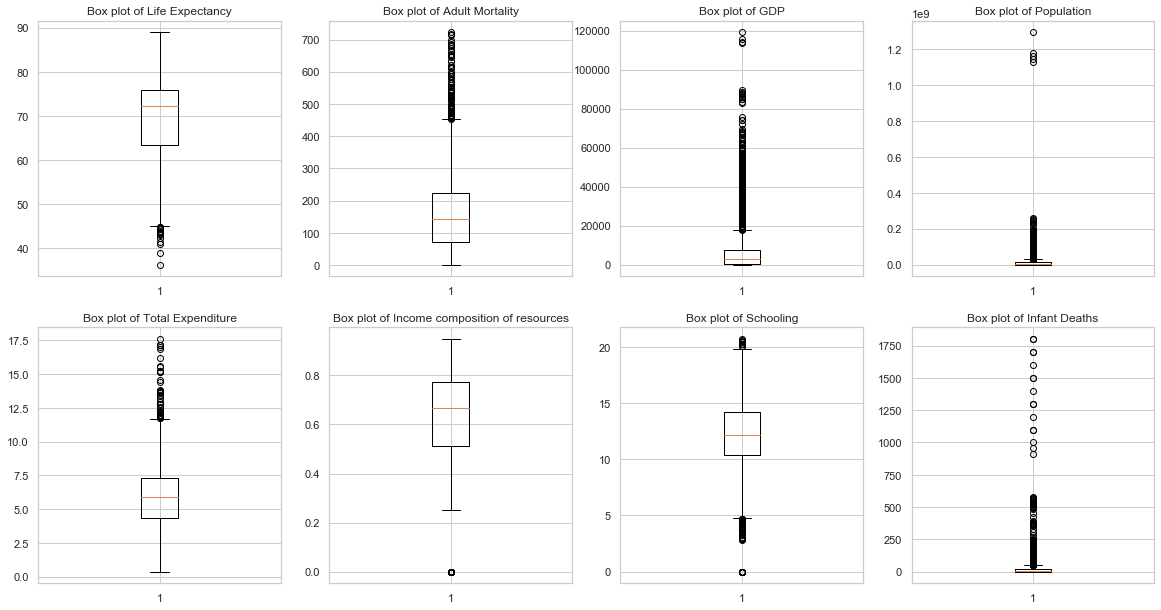

In [6]:
#Distribution of raw data 
plt.figure(figsize=(20,16))

plt.subplot(3,4,1)
plt.boxplot(life_df["Life expectancy "])
plt.title("Box plot of Life Expectancy")

plt.subplot(3,4,2)
plt.boxplot(life_df["Adult Mortality"])
plt.title("Box plot of Adult Mortality")

plt.subplot(3,4,3)
plt.boxplot(life_df["GDP"])
plt.title("Box plot of GDP")

plt.subplot(3,4,4)
plt.boxplot(life_df["Population"])
plt.title("Box plot of Population")

plt.subplot(3,4,5)
plt.boxplot(life_df["Total expenditure"])
plt.title("Box plot of Total Expenditure")

plt.subplot(3,4,6)
plt.boxplot(life_df["Income composition of resources"])
plt.title("Box plot of Income composition of resources")

plt.subplot(3,4,7)
plt.boxplot(life_df["Schooling"])
plt.title("Box plot of Schooling")

plt.subplot(3,4,8)
plt.boxplot(life_df["infant deaths"])
plt.title("Box plot of Infant Deaths")
plt.show()

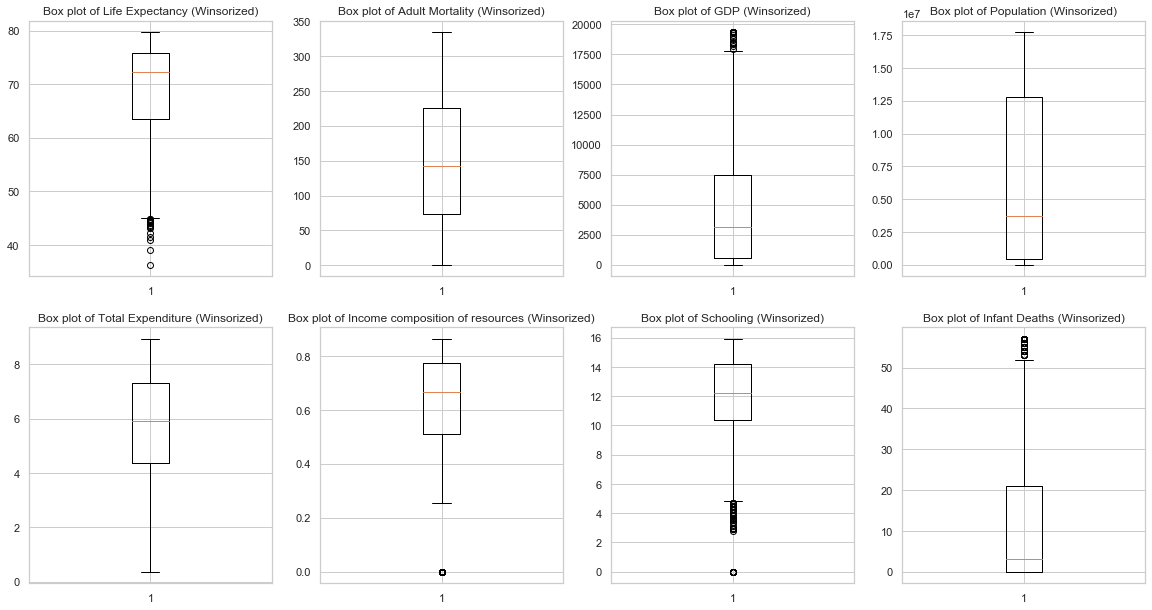

In [7]:
# Distribution of winsorized data
from scipy.stats.mstats import winsorize

life_df["w_LExpectancy"] = winsorize(life_df["Life expectancy "], (0, 0.10))
life_df["w_AMortality"] = winsorize(life_df["Adult Mortality"], (0, 0.10))
life_df["w_GDP"] = winsorize(life_df["GDP"], (0, 0.10))
life_df["w_Population"] = winsorize(life_df["Population"], (0, 0.10))
life_df["w_TExpenditure"] = winsorize(life_df["Total expenditure"], (0, 0.10))
life_df["w_ICRes"] = winsorize(life_df["Income composition of resources"], (0, 0.10))
life_df["w_Schooling"] = winsorize(life_df["Schooling"], (0, 0.10))
life_df["w_IDeaths"] = winsorize(life_df["infant deaths"], (0, 0.10))

plt.figure(figsize=(20,16))

plt.subplot(3,4,1)
plt.boxplot(life_df["w_LExpectancy"])
plt.title("Box plot of Life Expectancy (Winsorized)")

plt.subplot(3,4,2)
plt.boxplot(life_df["w_AMortality"])
plt.title("Box plot of Adult Mortality (Winsorized)")

plt.subplot(3,4,3)
plt.boxplot(life_df["w_GDP"])
plt.title("Box plot of GDP (Winsorized)")

plt.subplot(3,4,4)
plt.boxplot(life_df["w_Population"])
plt.title("Box plot of Population (Winsorized)")

plt.subplot(3,4,5)
plt.boxplot(life_df["w_TExpenditure"])
plt.title("Box plot of Total Expenditure (Winsorized)")

plt.subplot(3,4,6)
plt.boxplot(life_df["w_ICRes"])
plt.title("Box plot of Income composition of resources (Winsorized)")

plt.subplot(3,4,7)
plt.boxplot(life_df["w_Schooling"])
plt.title("Box plot of Schooling (Winsorized)")

plt.subplot(3,4,8)
plt.boxplot(life_df["w_IDeaths"])
plt.title("Box plot of Infant Deaths (Winsorized)")
plt.show()

Based on the outcomes of winsorization and log transformations, I chose to use winsorization due to it better limiting the number of outliers versus log transformation.

In [13]:
# Univariate analysis
life_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Income composition of resources,Schooling,w_LExpectancy,w_AMortality,w_GDP,w_Population,w_TExpenditure,w_ICRes,w_Schooling,w_IDeaths
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2.888000e+03,2888.000000,2888.000000,2888.000000,2888.000000
mean,2007.515235,69.349377,163.357341,30.314751,4.641347,749.475611,81.007182,2442.514543,38.221087,41.985803,...,0.632266,12.109469,69.050658,153.564751,5338.143691,6.581523e+06,5.775335,0.629128,11.984781,13.615305
std,4.606938,9.495441,124.018934,118.891670,3.928765,2003.090073,22.591612,11561.322467,19.962630,161.743345,...,0.200418,3.107469,9.079065,100.565212,5981.515688,6.480000e+06,2.048374,0.196405,2.899485,19.419276
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,36.300000,1.000000,1.681350,3.400000e+01,0.370000,0.000000,0.000000,0.000000
25%,2004.000000,63.475000,73.000000,0.000000,1.107500,5.049462,80.940461,0.000000,19.300000,0.000000,...,0.511750,10.400000,63.475000,73.000000,579.651825,4.158228e+05,4.370000,0.511750,10.400000,0.000000
50%,2008.000000,72.200000,143.000000,3.000000,4.165000,67.687008,87.000000,17.000000,43.250000,4.000000,...,0.666000,12.200000,72.200000,143.000000,3156.550182,3.692912e+06,5.930000,0.666000,12.200000,3.000000
75%,2012.000000,75.800000,225.000000,21.000000,7.490000,454.422430,96.000000,352.250000,56.100000,26.000000,...,0.774000,14.200000,75.800000,225.000000,7483.158469,1.275338e+07,7.322500,0.774000,14.200000,21.000000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,...,0.948000,20.700000,79.700000,334.000000,19356.672360,1.773163e+07,8.930000,0.862000,15.900000,57.000000


In [ ]:
# Relative weight of countries in dataset
plt.figure(figsize=(12, 30))
plt.barh(life_df.groupby("Country")["Country"].count().index, 
        life_df.groupby("Country")["Country"].count())
plt.title("Relative prevalence of country representation ")

plt.show()

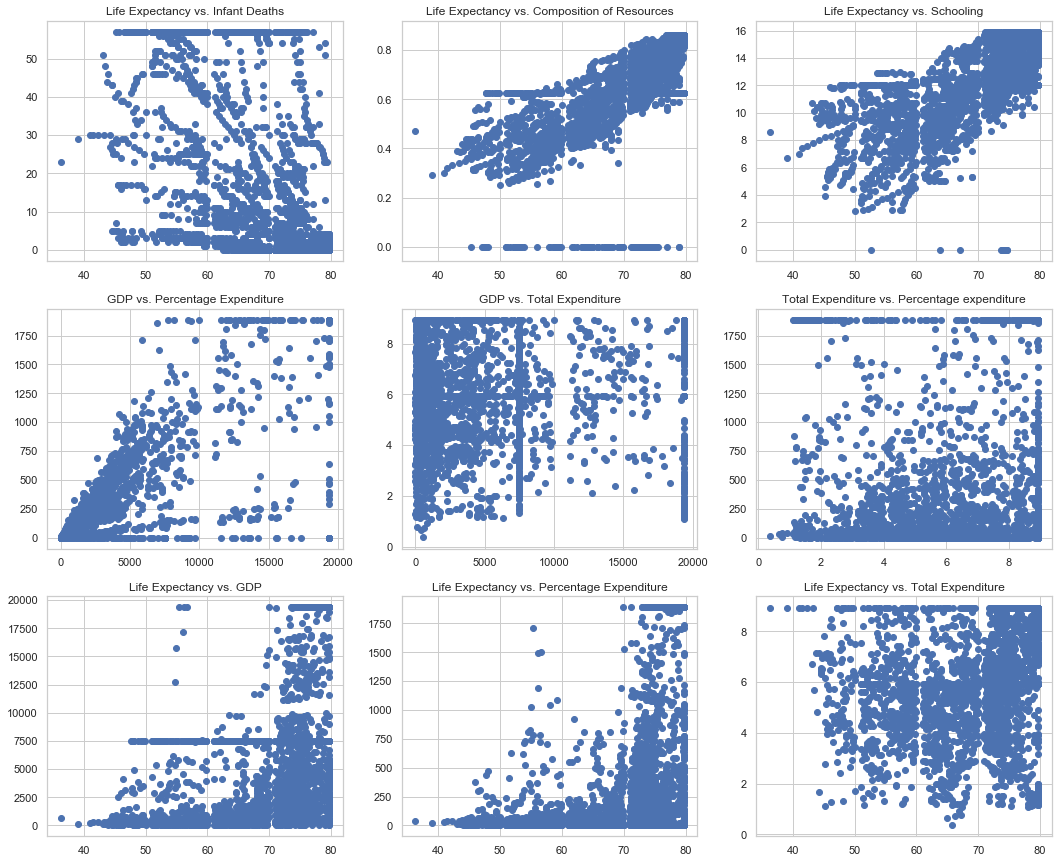

In [17]:
# Multivariate analysis
plt.figure(figsize=(18,15))

# Direct effects on life expectancy
plt.subplot(3,3,1)
plt.scatter(life_df['w_LExpectancy'], life_df['w_IDeaths'])
plt.title("Life Expectancy vs. Infant Deaths")

plt.subplot(3,3,2)
plt.scatter(life_df['w_LExpectancy'], life_df['w_ICRes'])
plt.title("Life Expectancy vs. Composition of Resources")

plt.subplot(3,3,3)
plt.scatter(life_df['w_LExpectancy'], life_df['w_Schooling'])
plt.title("Life Expectancy vs. Schooling")

# Monetary analysis
life_df["w_PExpenditure"] = winsorize(life_df["percentage expenditure"], (0, 0.10))

plt.subplot(3,3,4)
plt.scatter(life_df['w_GDP'], life_df['w_PExpenditure'])
plt.title("GDP vs. Percentage Expenditure")

plt.subplot(3,3,5)
plt.scatter(life_df['w_GDP'], life_df['w_TExpenditure'])
plt.title("GDP vs. Total Expenditure")

plt.subplot(3,3,6)
plt.scatter(life_df['w_TExpenditure'], life_df['w_PExpenditure'])
plt.title("Total Expenditure vs. Percentage expenditure")

# Life Expectancy vs. Monetary analysis
plt.subplot(3,3,7)
plt.scatter(life_df['w_LExpectancy'], life_df['w_GDP'])
plt.title("Life Expectancy vs. GDP")

plt.subplot(3,3,8)
plt.scatter(life_df['w_LExpectancy'], life_df['w_PExpenditure'])
plt.title("Life Expectancy vs. Percentage Expenditure")

plt.subplot(3,3,9)
plt.scatter(life_df['w_LExpectancy'], life_df['w_TExpenditure'])
plt.title("Life Expectancy vs. Total Expenditure")

plt.show()

In the first set of 3 plots, as would be likely expected, life expectancy has a generally positive relationship with composition of resources and schooling. Interestingly, there appears to be a weak correlation suggesting that infant deaths has a negative relationship with life expectancy. 

In the second set of plots, there appears to be a weak positive relationship between GDP and percent expenditure but otherwise no intra-monetary relationships.

In the final set, I wanted to compare the two variable groups. Unfortunately, it doesn't appears that there is any significant correlation here so I need to look at the correlation of all the variables to determine which relationships exist.

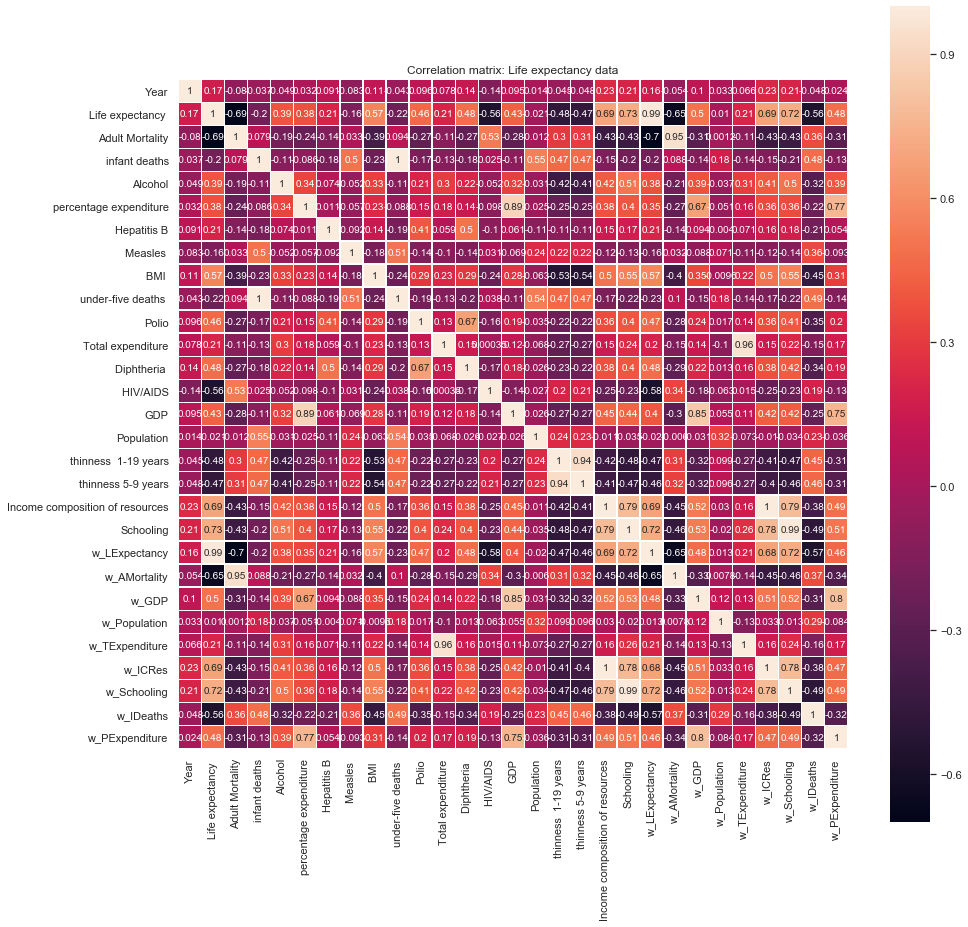

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(life_df.corr(), square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix: Life expectancy data")
plt.show()

In examining the correlation matrix, we can start to gain insight into potential relationships worth examining further. Since we are looking for relationships with life expectancy I started by examining the correlations with this variable and plotting the relationships. 

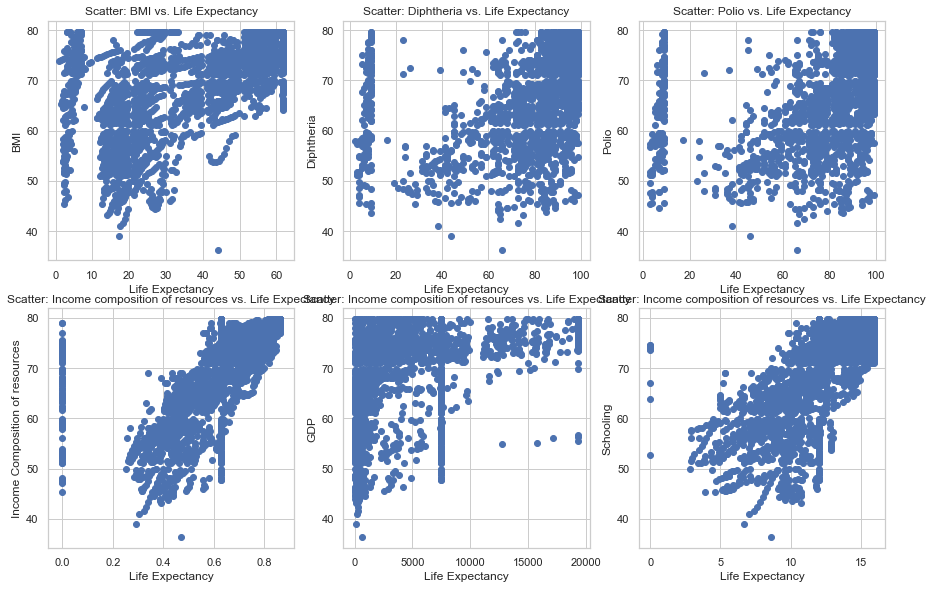

In [46]:
# Feature selection

life_df["w_BMI"] = winsorize(life_df[" BMI "], (0, 0.10))
life_df["w_Polio"] = winsorize(life_df["Polio"], (0, 0.10))
life_df["w_Diphtheria"] = winsorize(life_df["Diphtheria "], (0, 0.10))


plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
plt.scatter(life_df['w_BMI'], life_df['w_LExpectancy'])
plt.xlabel('Life Expectancy')
plt.ylabel('BMI')
plt.title('Scatter: BMI vs. Life Expectancy')

plt.subplot(3,3,2)
plt.scatter(life_df['w_Diphtheria'], life_df['w_LExpectancy'])
plt.xlabel('Life Expectancy')
plt.ylabel('Diphtheria')
plt.title('Scatter: Diphtheria vs. Life Expectancy')

plt.subplot(3,3,3)
plt.scatter(life_df['w_Polio'], life_df['w_LExpectancy'])
plt.xlabel('Life Expectancy')
plt.ylabel('Polio')
plt.title('Scatter: Polio vs. Life Expectancy')

plt.subplot(3,3,4)
plt.scatter(life_df['w_ICRes'], life_df['w_LExpectancy'])
plt.xlabel('Life Expectancy')
plt.ylabel('Income Composition of resources')
plt.title('Scatter: Income composition of resources vs. Life Expectancy')

plt.subplot(3,3,5)
plt.scatter(life_df['w_GDP'], life_df['w_LExpectancy'])
plt.xlabel('Life Expectancy')
plt.ylabel('GDP')
plt.title('Scatter: Income composition of resources vs. Life Expectancy')

plt.subplot(3,3,6)
plt.scatter(life_df['w_Schooling'], life_df['w_LExpectancy'])
plt.xlabel('Life Expectancy')
plt.ylabel('Schooling')
plt.title('Scatter: Income composition of resources vs. Life Expectancy')

plt.show()

Based on correlation findings, the six variables above (BMI, Diphtheria, Polio, Income composition of resources, GDP, and Schooling) have the strongest correlation with life expectancy.